# Sentimental Tweets Videos Games

In [1]:
import pandas as pd

In [2]:
data_path = "data"

In [3]:
df = pd.read_csv(f"{data_path}/twitter_training.csv",names=["index_category", "game_category","sentiment_category","Tweet"])

In [4]:
df.head()

,index_category,game_category,sentiment_category,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index_category      74682 non-null  int64 
 1   game_category       74682 non-null  object
 2   sentiment_category  74682 non-null  object
 3   Tweet               73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
print("Taille de données restant:", df.shape)

Taille de données restant: (74682, 4)


In [7]:
df = df.drop(columns='index_category',axis=1)
df.head()

,game_category,sentiment_category,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
#df.to_csv("new_twitter_training.csv",index=False)

In [9]:
print(df.isnull().sum())

game_category           0
sentiment_category      0
Tweet                 686
dtype: int64


In [10]:
print("Avant la suppression des données manquantes: ",len(df))
df = df.dropna()
print("Après la suppression des données manquantes: ",len(df))

Avant la suppression des données manquantes:  74682
Après la suppression des données manquantes:  73996


In [11]:
df = df.drop_duplicates()
print("Taille de données restant:", df.shape)

Taille de données restant: (70958, 3)


In [12]:
exclude_categories = ['johnson&johnson', 'Amazon','Nvidia','PlayStation5(PS5)','Xbox(Xseries)','HomeDepot','Verizon','Facebook','Google','Microsoft']

df = df[~df['game_category'].isin(exclude_categories)]

In [13]:
df['sentiment_category'] = df['sentiment_category'].replace('Irrelevant', 'Neutral')

In [14]:
print("Taille de données restant:", df.shape)

Taille de données restant: (48731, 3)


In [15]:
df.head()

,game_category,sentiment_category,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data exploration

### Liste des noms de jeux et entreprises

In [16]:
all_games_category = df['game_category'].unique()
print(all_games_category)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Overwatch' 'NBA2K' 'Dota2'
 'WorldOfCraft' 'CS-GO' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'FIFA' 'RedDeadRedemption(RDR)'
 'CallOfDuty' 'TomClancysRainbowSix' 'GrandTheftAuto(GTA)' 'MaddenNFL'
 'Cyberpunk2077' 'TomClancysGhostRecon']


In [17]:
all_sentiments = df['sentiment_category'].unique()
print(all_sentiments)

['Positive' 'Neutral' 'Negative']


In [18]:
counts_games = df['game_category'].value_counts().sort_index()
print(counts_games)

game_category
ApexLegends                          2246
AssassinsCreed                       2145
Battlefield                          2236
Borderlands                          2192
CS-GO                                2169
CallOfDuty                           2304
CallOfDutyBlackopsColdWar            2233
Cyberpunk2077                        2146
Dota2                                2218
FIFA                                 2224
Fortnite                             2162
GrandTheftAuto(GTA)                  2201
Hearthstone                          2201
LeagueOfLegends                      2228
MaddenNFL                            2294
NBA2K                                2290
Overwatch                            2208
PlayerUnknownsBattlegrounds(PUBG)    2112
RedDeadRedemption(RDR)               2124
TomClancysGhostRecon                 2263
TomClancysRainbowSix                 2287
WorldOfCraft                         2248
Name: count, dtype: int64


In [19]:
counts_sentiments = df['sentiment_category'].value_counts().sort_index()
print(counts_sentiments)

sentiment_category
Negative    14986
Neutral     19427
Positive    14318
Name: count, dtype: int64


In [20]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

# Calculate the percentage of each sentiment class
sentiment_percentage = df['sentiment_category'].value_counts(normalize=True) * 100

# Convert the calculated percentages into DataFrame for plotting
percentage_df = pd.DataFrame({'Sentiment': sentiment_percentage.index, 'Percentage': sentiment_percentage.values})

# Plot the bar plot with percentages visible
fig = px.bar(percentage_df, x='Sentiment', y='Percentage', text='Percentage',
             title="Percentage of Each Sentiment Class", labels={'Sentiment': 'Sentiment Class', 'Percentage': 'Percentage (%)'})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=600, height=500)
fig.show()

### Le coefficient de Gini obtenu vous permettra de répondre aux questions suivantes : <br>
 
Les sentiments sont-ils bien répartis entre les différentes catégories ? <br>
Y a-t-il une forte concentration dans une ou deux catégories spécifiques ? <br>

Si le coefficient de Gini est proche de 0, cela signifie que les sentiments sont assez équilibrés entre les différentes catégories (positif, neutre, négatif). <br>
Si le coefficient de Gini est proche de 1, cela signifie qu'il y a une grande concentration des sentiments dans une seule catégorie, et les autres sont peu représentées. <br>


In [21]:
import numpy as np

# Fonction pour calculer le coefficient de Gini
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

# Dataset pour la répartition des sentiments de chaque tweet
percentages = df['sentiment_category'].value_counts(normalize=True)

# Calcul du coefficient de Gini
gini_coefficient = gini(percentages)
print("Coefficient de Gini :", round(gini_coefficient,2))

Coefficient de Gini : 0.07


### Data preprocessing

In [22]:
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
english_stopwords = set(stopwords.words('english'))

def remove_emoji():
  regex_pattern = re.compile(pattern = "["    #Pattern pour enlever les emojis
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                            "]+", flags = re.UNICODE)
  return regex_pattern


def clean_text(text):
    
    """
    On retire tout d'abord nettoyer les tweets qui ne pourront pas nous servir
    """
    text = text.lower()
    text = re.sub(r'{link}', '',text) #Remove links 
    text = re.sub(r"\[video\]", '',text) #Remove videos
    text = re.sub(r'&[a-z]+;', '',text) #Remove HTML references

    text = re.sub(r'@\w+', '', text) #Remove mention
    text = re.sub(r'#\w+', '', text) #Remove hashtag

    text = re.sub(r'\d+', '', text) #Remove numbers 
    text = re.sub(r'http\S+', '',text) #Remove HTML
    text = re.sub(r'www\S+', '',text) #Remove HTML
    text = re.sub(r'[^\w\s]+',' ',text) #Remove ponctuation et apostrophes
    text = re.sub(r'\s+',' ', text) #Remove new line characters
    text = re.sub(r'[^\w\s]+',' ',text) #Remove ponctuation et apostrophes
    text = re.sub(remove_emoji(),'',text)  #Remove les emojis

    """
    Puis on souhaitera de transformer les mots courants vers des mots plus expressives en anglais
    """
    text = re.sub(r"won\'t", "would not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "I am", text)
    text  = re.sub(r"can\'t", "can not", text)
    text  = re.sub(r"don\'t", "do not", text)
    text  = re.sub(r"shouldn\'t", "should not", text)
    text  = re.sub(r"needn\'t", "need not", text)
    text  = re.sub(r"hasn\'t", "has not", text)
    text  = re.sub(r"haven\'t", "have not", text)
    text  = re.sub(r"weren\'t", "were not", text)
    text  = re.sub(r"mightn\'t", "might not", text )
    text  = re.sub(r"didn\'t", "did not", text )
    text  = re.sub(r"n\'t", " not", text )
    text  = re.sub(r"\'re", " are", text )
    text  = re.sub(r"\'s", " is", text )
    text  = re.sub(r"\'d", " would", text )
    text  = re.sub(r"\'ll", " will", text )
    text  = re.sub(r"\'t", " not", text )
    text  = re.sub(r"\'ve", " have", text )
    text  = re.sub(r"\'m", " am", text )
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords from the tokenized text
    filtered_tokens = [word for word in tokens if word.lower() not in english_stopwords]

    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

df['tweet_clean'] = df['Tweet'].apply(clean_text)

In [24]:
df.head()

,game_category,sentiment_category,Tweet,tweet_clean
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands murder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands kill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands murder
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands murder


Interpréter les poids des termes de vocabulaire (par exemple faire un heatmap)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer(
    max_features = 3000,
    max_df = 1.0,
    min_df = 10,
    ngram_range=(1, 1)
)
X = vectorizer.fit_transform(df['tweet_clean'])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 395761 stored elements and shape (48731, 3000)>
  Coords	Values
  (0, 1115)	0.48345645629282835
  (0, 313)	0.44426100341495134
  (0, 1723)	0.7542559351529964
  (1, 525)	0.7124862090508931
  (1, 1410)	0.7016861135239081
  (2, 1115)	0.5569316888615897
  (2, 313)	0.5117793499428827
  (2, 1410)	0.6541475299302275
  (3, 313)	0.42383248158428954
  (3, 1723)	0.7195728688502189
  (3, 525)	0.5500735532351726
  (4, 1115)	0.48345645629282835
  (4, 313)	0.44426100341495134
  (4, 1723)	0.7542559351529964
  (5, 1115)	0.48345645629282835
  (5, 313)	0.44426100341495134
  (5, 1723)	0.7542559351529964
  (6, 2459)	0.2551578413945981
  (6, 1283)	0.21379391139866039
  (6, 1584)	0.2136090035015104
  (6, 2429)	0.19542611612077695
  (6, 1081)	0.16933458193087786
  (6, 1424)	0.17776071028753596
  (6, 1291)	0.22908627332575493
  (6, 944)	0.22979528551372286
  :	:
  (48727, 2735)	0.39229343423746055
  (48727, 1962)	0.3579255371954651
  (48727, 2677)	0

In [26]:
print("Vocab size: ", len(vectorizer.vocabulary_))
print("Vocab", vectorizer.vocabulary_)

## Faire un graphe pour déterminer chaque vocabulaire qui centre le plus

Vocab size:  3000
Vocab {'getting': np.int64(1115), 'borderlands': np.int64(313), 'murder': np.int64(1723), 'coming': np.int64(525), 'kill': np.int64(1410), 'spent': np.int64(2459), 'hours': np.int64(1283), 'making': np.int64(1584), 'something': np.int64(2429), 'fun': np.int64(1081), 'know': np.int64(1424), 'huge': np.int64(1291), 'fan': np.int64(944), 'maya': np.int64(1614), 'one': np.int64(1817), 'favorite': np.int64(961), 'characters': np.int64(449), 'decided': np.int64(675), 'make': np.int64(1582), 'pc': np.int64(1887), 'original': np.int64(1839), 'amage': np.int64(81), 'made': np.int64(1574), 'enjoy': np.int64(850), 'pic': np.int64(1908), 'twitter': np.int64(2749), 'com': np.int64(517), 'couple': np.int64(590), 'picture': np.int64(1913), 'compared': np.int64(537), 'rhandlerr': np.int64(2193), 'rock': np.int64(2211), 'hard': np.int64(1205), 'la': np.int64(1433), 'rare': np.int64(2095), 'powerful': np.int64(1990), 'handsome': np.int64(1197), 'xbox': np.int64(2967), 'dlvr': np.int64(

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir en DataFrame pour plus de clarté
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Étape 2 : Filtrer la plage des documents (indices des documents inclus)
def filter_documents(tfidf_df, start_doc, end_doc):
    return tfidf_df.iloc[start_doc:end_doc]

# Étape 3 : Sélectionner les mots avec les scores les plus élevés
# Limiter le nombre de mots les plus importants (par colonne globale)
def filter_top_words(tfidf_df, top_n):
    # Obtenir les mots les plus importants selon leur importance moyenne
    word_scores = tfidf_df.mean(axis=0).sort_values(ascending=False)
    top_words = word_scores.head(top_n).index
    return tfidf_df[top_words]

# Étape 4 : Générer le heatmap
def plot_heatmap(filtered_df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(filtered_df, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
    plt.title("Heatmap des scores TF-IDF")
    plt.xlabel("Mots")
    plt.ylabel("Tweets")
    plt.show()


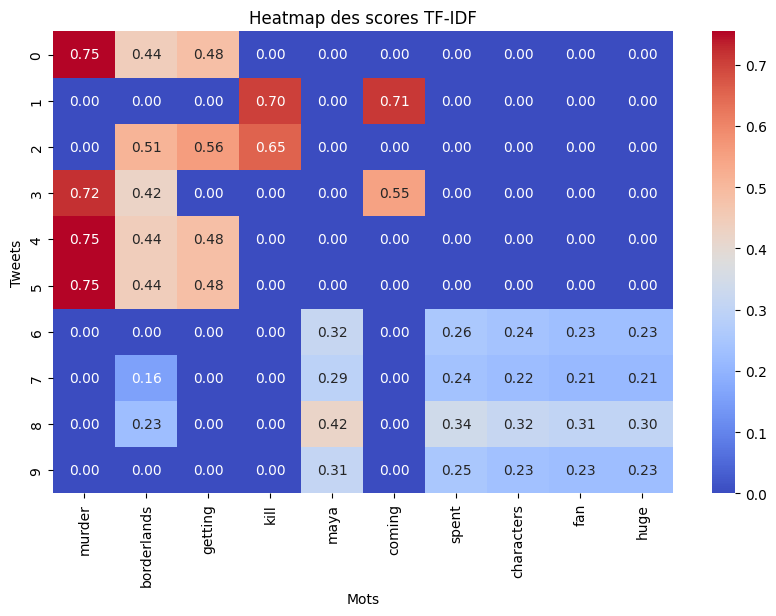

In [28]:
# Exemple d'utilisation
start_doc, end_doc = 0, 10  # Inclure les 10 premiers documents
top_n_words = 10            # Afficher les 5 mots les plus importants

filtered_docs = filter_documents(tfidf_df, start_doc, end_doc)
filtered_top_words = filter_top_words(filtered_docs, top_n_words)

# Afficher le heatmap
plot_heatmap(filtered_top_words)

In [29]:
# Encodage des catégories
sentiments = LabelEncoder()
df['sentiment_category_encoded'] = sentiments.fit_transform(df['sentiment_category'])
y = df['sentiment_category_encoded']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
#@title
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
}

# Train and evaluate classifiers with cross-validation
for clf_name, clf in classifiers.items():
    print(clf_name)
    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean()}")

    # Fit the classifier on the entire training set
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    test_score = clf.score(X_test, y_test)

    print(f"Test score: {test_score}\n")

Logistic Regression
Cross-validation scores: [0.71449509 0.71503958 0.72324831 0.7176781  0.72017004]
Mean cross-validation score: 0.7181262241251792
Test score: 0.7249658002735978

Random Forest
Cross-validation scores: [0.85402316 0.85722662 0.87100557 0.86352976 0.8554676 ]
Mean cross-validation score: 0.8602505416840526
Test score: 0.8812585499316006

SVC


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir les hyperparamètres à tester
param_distributions = {
    'n_estimators': randint(100, 200),  # Distribution pour le nombre d'arbres
    'max_depth': [None, 6],            # Valeurs fixes possibles
    'min_samples_split': randint(2, 5),  # Distribution pour le nombre minimal d'échantillons
    'min_samples_leaf': randint(1, 2)    # Distribution pour les feuilles
}

# Instanciation du modèle
rf_model = RandomForestClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,                 # Nombre d'échantillons aléatoires à tester
    scoring='accuracy',        # Métrique d'évaluation
    cv=5,                      # Validation croisée avec 5 folds
    verbose=1,                 # Affichage des détails
    random_state=42,           # Pour la reproductibilité
    n_jobs=-1                  # Utilisation de tous les cœurs disponibles
)

# Entraînement de RandomizedSearchCV
random_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

# Prédictions
y_pred = model_1.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=sentiments.classes_))

In [ ]:
# Modèle
model_2 = RandomForestClassifier(**best_params)
model_2.fit(X_train, y_train)

# Prédictions
y_pred = model_2.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=sentiments.classes_))

In [ ]:
# Exemple de tweets à prédire
new_tweets = [
    # Positive
    "I love playing Call of Duty, the action is incredible!",
    "Borderlands 3 is such an amazing game, highly recommended!",
    # Negative
    "Dota2's community is so toxic, it's hard to enjoy the game sometimes.",
    "Cyberpunk2077 still has bugs even after all these patches.",
    # Neutral
    "AssassinsCreed's open worlds are impressive, but they can feel overwhelming.",
    "Thinking about trying out Cyberpunk 2077; heard mixed reviews. #Cyberpunk2077",
    "Did you know Overwatch lore? But I'm not into gaming much.",
    "Fortnite is creative with its events, but I'm not into building mechanics."
]

# Vectoriser les nouveaux tweets
new_tweets_tfidf = vectorizer.transform(new_tweets)

# Faire les prédictions
#predicted_sentiments = model_2.predict(new_tweets_tfidf)
predicted_sentiments = model_1.predict(new_tweets_tfidf)

# Afficher les résultats
for tweet, sentiment in zip(new_tweets, predicted_sentiments):
    sentiment_class = sentiments.inverse_transform([sentiment])[0]
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment} = {sentiment_class}")

In [ ]:
print(new_tweets_tfidf)

In [ ]:
# Exemple d'utilisation
tfidf_df_2 = pd.DataFrame(new_tweets_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

start_doc, end_doc = 0, 7  # Inclure les 10 premiers documents
top_n_words = 10            # Afficher les 5 mots les plus importants

filtered_docs = filter_documents(tfidf_df, start_doc, end_doc)
filtered_top_words = filter_top_words(filtered_docs, top_n_words)

# Afficher le heatmap
plot_heatmap(filtered_top_words)